In [1]:
import os
import glob
import nltk
import pandas as pd
import numpy as np
import matplotlib

In [2]:
# Change the current directory to read the data
os.chdir(r"C:\Users\Sultan\Desktop\data\PreprocessedData") 

In [3]:
#Read csv file into a dataframe
df = pd.read_csv(r'CombinedData.csv', engine='python')

In [4]:
df.head()

,ï»¿word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [5]:
# Rename col 0
df.columns = ['word','organization','year']
df.head()

,word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


#### Creating Pandas Series out of the word col

In [6]:
text = df.word
text.head()

0     fiscal
1       year
2    adopted
3     budget
4     brenda
Name: word, dtype: object

#### Extract 200000 elements from the series

In [7]:
corpus = text[0:200000]
    
# Join the elements and sperate them by a single space
corpus = ' '.join(word for word in corpus)

In [8]:
corpus[:196] # Let's see the first 196 chars in the series

'fiscal year adopted budget brenda jones county manager sharisse fuller assistant county managerhuman resources director prepared office budget management evaluation michael halford budget director'

#### Tokenizing +  Building bigrams 

In [9]:
# Tokenize
tokens = nltk.word_tokenize(corpus)

# Create bigrams
bgs = nltk.bigrams(tokens)

#### Computing raw frequency of the bigrams

In [10]:
# Compute frequency distribution for all the bigrams in the corpus
fdist = nltk.FreqDist(bgs)

# Convert nltk freq dist to dictonary
fdistDic = fdist.items()

#### Creating a data frame out of the dictionary 

In [11]:
fdist_df = pd.DataFrame.from_dict(fdistDic)
fdist_df.columns = ['(Word1, Word2)','Collection Frequency']
fdist_df.head()

,"(Word1, Word2)",Collection Frequency
0,"(fiscal, year)",279
1,"(year, adopted)",10
2,"(adopted, budget)",130
3,"(budget, brenda)",1
4,"(brenda, jones)",2


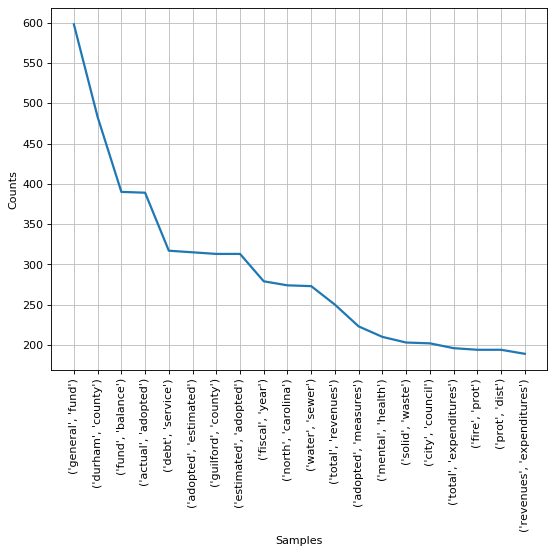

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')

fdist.plot(20, cumulative=False)

#### Let's do some filtering for the bigrams

In [30]:
# I want to find the mean and variance, and then fit an estimator 
# Keep in mind the data we have is from 2020-2013